### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,total_moves,w_captures,w_checks,w_castles,w_promotions,b_captures,b_checks,b_castles,...,check_diff,total_promotions,promotion_diff,aggression_diff,both_castled,game_length_short,game_length_medium,game_length_long,tactical_intensity,white_more_aggressive
0,2504,2371,49,4,0,1,0,4,0,1,...,0,0,0,-0.006667,1,0,1,0,0.163265,0
1,2487,2596,71,8,10,1,0,7,2,1,...,8,0,0,0.242857,1,0,0,1,0.380282,1
2,2915,2921,59,4,0,1,0,4,0,1,...,0,0,0,-0.004598,1,0,1,0,0.135593,0
3,2542,2433,71,10,1,1,0,9,3,0,...,-2,0,0,-0.037302,0,0,0,1,0.323944,0
4,2473,2658,56,5,3,1,0,6,0,1,...,3,0,0,0.071429,1,0,1,0,0.250000,1


### 2. Prepare data

In [3]:
X = df.drop(["ResultNumeric"], axis=1)
y = df["ResultNumeric"]

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3267529, 36)
Target: (3267529,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,
    stratify=y,
)

### 4. Train model

In [5]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss",
)

In [6]:
start_time = time.time()

xgb_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(
    f"Training completed in {training_time:.2f} seconds ({training_time / 60:.2f} minutes)"
)

Training completed in 44.95 seconds (0.75 minutes)


### 5. Evaluate

In [7]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Set Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)\n")

print("Classification Report:\n")
print(
    classification_report(
        y_test, y_pred, target_names=["Black Win", "Draw", "White Win"]
    )
)


Test Set Accuracy: 0.8171 (81.71%)

Classification Report:

              precision    recall  f1-score   support

   Black Win       0.81      0.85      0.83    267653
        Draw       0.81      0.56      0.66     84330
   White Win       0.83      0.86      0.84    301523

    accuracy                           0.82    653506
   macro avg       0.81      0.76      0.78    653506
weighted avg       0.82      0.82      0.81    653506



### 6. Confusion Matrix

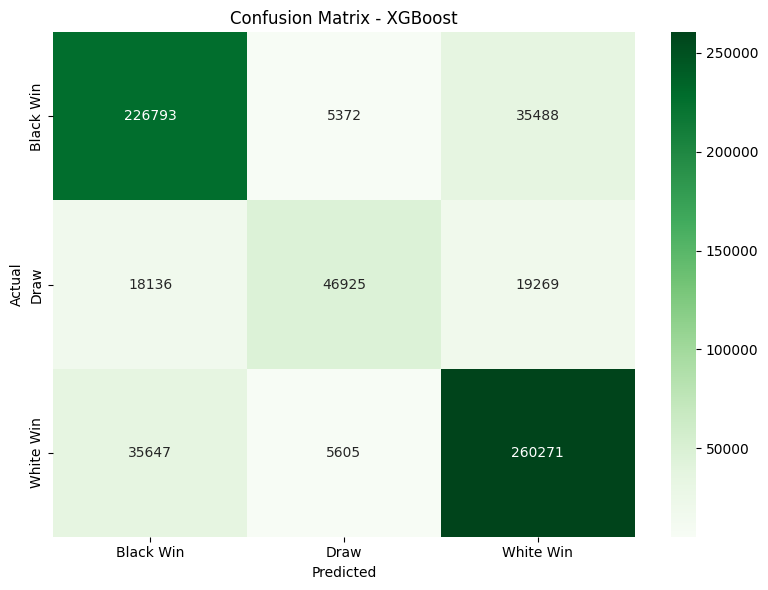

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Black Win", "Draw", "White Win"],
    yticklabels=["Black Win", "Draw", "White Win"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()

### 7. Feature Importance

                  Feature  Importance
23           capture_diff    0.191448
35  white_more_aggressive    0.183978
17              AvgRating    0.102603
22         total_captures    0.051467
29        aggression_diff    0.047097
19   WhiteRatingAdvantage    0.033246
32     game_length_medium    0.033041
27       total_promotions    0.032481
3              w_captures    0.028713
7              b_captures    0.028626
21          TerminationID    0.025624
2             total_moves    0.025133
1                BlackElo    0.020880
28         promotion_diff    0.020582
0                WhiteElo    0.018355
24       capture_diff_abs    0.018104
25           total_checks    0.017072
26             check_diff    0.015884
8                b_checks    0.013914
12         b_capture_rate    0.011040
34     tactical_intensity    0.009916
16             RatingDiff    0.009440
11         w_capture_rate    0.009159
4                w_checks    0.008951
15            EventTypeID    0.008005
6           

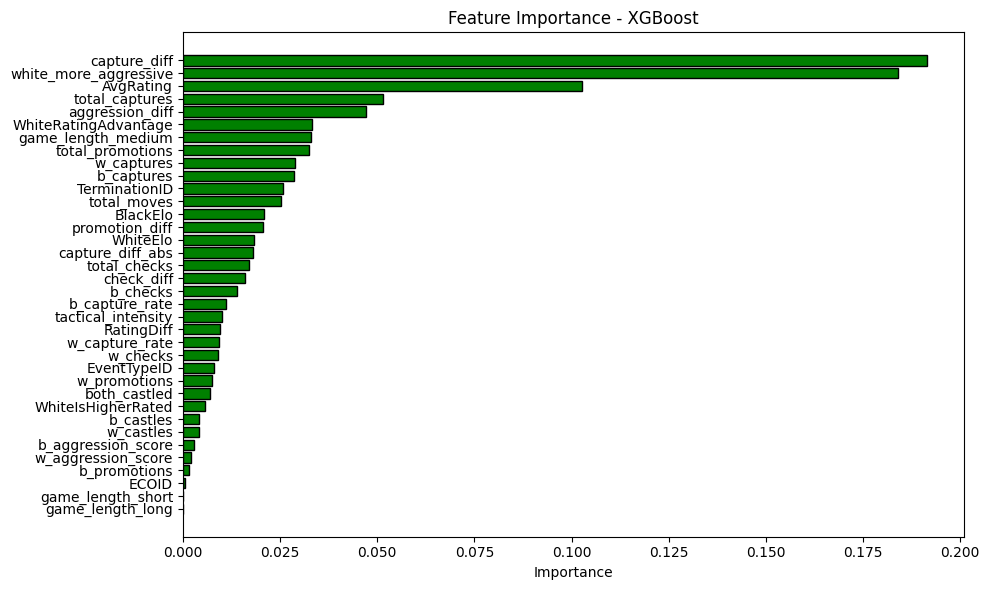

In [9]:
importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": xgb_model.feature_importances_}
).sort_values("Importance", ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    color="green",
    edgecolor="black",
)
plt.xlabel("Importance")
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()